In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/btp-data/musicDataAllSubjects.csv'
raw_df = pd.read_csv(path)
raw_df = raw_df['fp1']
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(10)

0    191.313644
1    196.947540
2    203.501801
3    210.446854
4    217.094513
5    222.857788
6    227.468414
7    231.066528
8    234.143402
9    237.364487
Name: fp1, dtype: float64

In [0]:
ekg_data_segment = raw_df
segment_len = 20
slide_len = 20

segments = []
for start_pos in range(0, len(ekg_data_segment), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(ekg_data_segment[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))

Produced 84011 waveform segments


In [0]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(segments) 

# Normalizing the Data 
# scaler= MinMaxScaler()
# scaler.fit(scaled_df) 
# normalized_df=scaler.transform(scaled_df)
normalized_df = normalize(scaled_df) 
  



# # Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
normalized_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.191601,0.195176,0.199329,0.203692,0.207877,0.211479,0.214349,0.216633,0.218570,0.220615,0.223159,0.226332,0.230086,0.234081,0.237900,0.241215,0.243806,0.245773,0.247432,0.249216
1,0.198721,0.201041,0.203837,0.206857,0.209816,0.212466,0.214682,0.216555,0.218294,0.220223,0.222613,0.225538,0.228921,0.232475,0.235852,0.238821,0.241217,0.243110,0.244741,0.246439
2,0.203617,0.205710,0.208182,0.210824,0.213362,0.215610,0.217434,0.218886,0.220166,0.221531,0.223219,0.225323,0.227796,0.230424,0.232928,0.235146,0.236958,0.238413,0.239699,0.241061
3,0.206752,0.208475,0.210478,0.212587,0.214561,0.216296,0.217688,0.218800,0.219842,0.221029,0.222556,0.224501,0.226814,0.229305,0.231714,0.233905,0.235772,0.237342,0.238777,0.240287
4,0.207668,0.209463,0.211495,0.213603,0.215553,0.217273,0.218650,0.219722,0.220691,0.221742,0.223050,0.224698,0.226649,0.228758,0.230808,0.232704,0.234359,0.235786,0.237122,0.238544


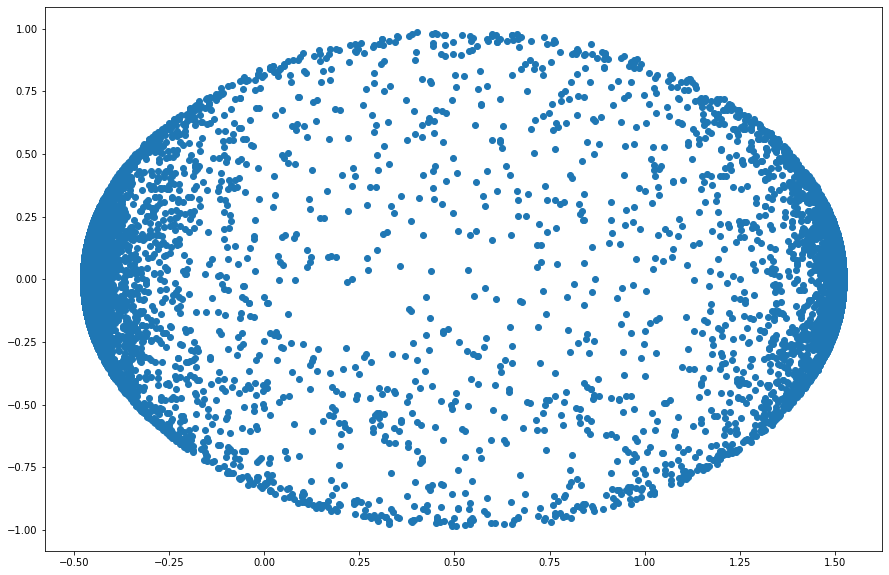

In [0]:

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)
plt.figure(figsize =(15, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'])

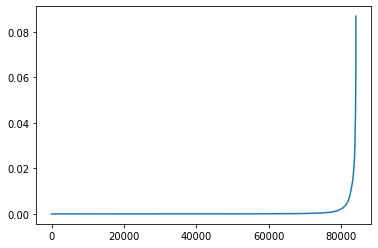

In [0]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_principal)
distances, indices = nbrs.kneighbors(X_principal)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

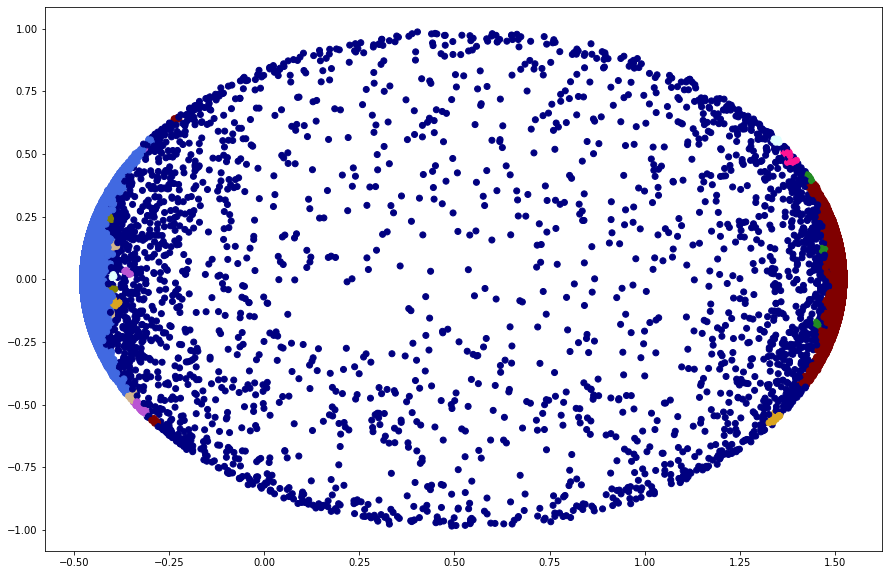

In [0]:
m = DBSCAN(eps=0.01, min_samples=8)
m.fit(X_principal)
clusters = m.labels_

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.figure(figsize =(15, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c=vectorizer(clusters))